


**Objectives**:
- Understand the dataset and perform necessary preprocessing.
- Train the model using selected algorithms.
- Evaluate the model's performance and fine-tune for better results.


In [1]:
# Importing the NumPy library for numerical computations and handling arrays
import numpy as np

# Importing the OpenCV library for image processing tasks
import cv2

# Importing the MNIST dataset from Keras for digit recognition
from keras.datasets import mnist

# Importing Sequential to create a layer-by-layer neural network model
from keras.models import Sequential

# Importing Dense for fully connected layers in the neural network
from keras.layers import Dense

# Importing Dropout to prevent overfitting by randomly dropping units during training
from keras.layers import Dropout

# Importing Flatten to convert multi-dimensional input into a single vector for the fully connected layer
from keras.layers import Flatten

# Importing Conv2D for convolutional layers to extract spatial features
from keras.layers import Conv2D

# Importing MaxPooling2D for down-sampling feature maps by pooling
from keras.layers import MaxPooling2D

# Importing model_from_json to load pre-trained models saved in JSON format
from keras.models import model_from_json

# Importing the backend module to access backend-specific functions (TensorFlow, Theano, etc.)
from keras import backend as K

# Setting the image data format to 'channels_first' (depth, height, width)
K.set_image_data_format('channels_first')

# Importing Image from IPython.display to display images in Jupyter notebooks
from IPython.display import Image



## Data Loading and Preprocessing

In this section, we load the dataset and preprocess it to ensure it is suitable for training the model.
Steps include handling missing values, feature scaling, and splitting the data into training and testing sets.


In [2]:
json_file = open(r'C:\Users\Abhishek\OneDrive\Desktop\VS Code\python\my_venv\handwritten eq recognition\model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# saving the archutecture of the model

#Loading saved weights into new model
loaded_model.load_weights(r"C:\Users\Abhishek\OneDrive\Desktop\VS Code\python\my_venv\handwritten eq recognition\model.weights.h5")

Reads the image in grayscale format.

Grayscale simplifies processing since it has only one channel (0-255 intensity values).


In [3]:
img = cv2.imread(r'C:\Users\Abhishek\OneDrive\Desktop\VS Code\python\my_venv\handwritten eq recognition\Test Image.jpeg',cv2.IMREAD_GRAYSCALE)

cv2.waitKey(0)
cv2.destroyAllWindows()

if img is not None:
    #Inverts the colors, making text white on a black background.
    #Easier to work with for contour detection.
    img =~ img

    #Converts the image to binary (black and white).
    #This isolates the text from the background.

    ret, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    #Detects the boundaries (contours) of the text or objects in the binary image.

    ctrs, ret = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #Sorts the contours left-to-right based on their x-coordinates.
    #Ensures the text is processed in reading order

    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w = int(28)
    h = int(28)
    train_data = []

    rects = []

    for c in cnt:
        x, y, w, h = cv2.boundingRect(c)
        rect = [x, y, w, h]
        rects.append(rect)

    bool_rect = []
    for r in rects:
        l = []
        for rec in rects:
            flag = 0

    #Checks if two bounding boxes overlap by comparing their coordinates.
    #Keeps only one box if overlap is detected to avoid duplicate or redundant regions.

            if (rec!=r):
                if (r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10)):
                    flag = 1
                l.append(flag)

            if (rec == r):
                l.append(0)

        bool_rect.append(l)

    dump_rect = []

    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j] == 1:
                area1 = rects[i][2]*rects[i][3]
                area2 = rects[j][2]*rects[j][3]
                if(area1 == min(area1,area2)):
                    dump_rect.append(rects[i])

    final_rect=[i for i in rects if i not in dump_rect]

    for r in final_rect:
        x = r[0]
        y = r[1]
        w = r[2]
        h = r[3]

    #Crops the region of interest (the text or object) from the thresholded image.
    #Adds a margin of 10 pixels around the crop for context.
    #Resizes the cropped image to 28x28 pixels (standard size for input to models like CNNs).
        im_crop = thresh[y:y+h+10,x:x+w+10]

        im_resize = cv2.resize(im_crop,(28,28))
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        im_resize=np.reshape(im_resize,(1,28,28,1))
        train_data.append(im_resize)




## Model Training

Here, we train the machine learning model on the prepared dataset.
The model parameters are tuned to achieve optimal performance.




 The test image --> 




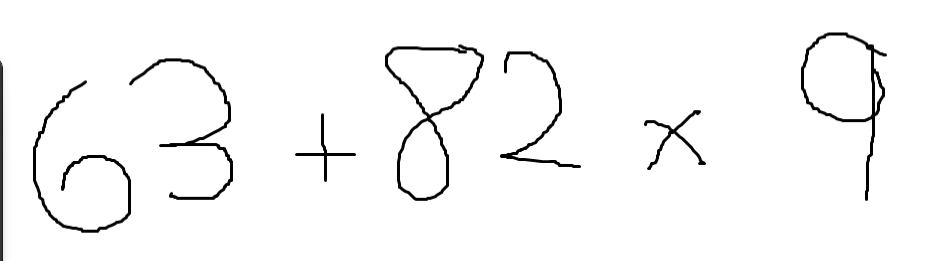

In [4]:
print("\n"*2, "The test image -->", "\n"*2)

Image(r'C:\Users\Abhishek\OneDrive\Desktop\VS Code\python\my_venv\handwritten eq recognition\tst 2.png')

In [5]:
s = ''

for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,1,28,28)

    result = (loaded_model.predict(train_data[i]) > 0.5).astype("int32")

    if(result[0][0]==1):
        s=s+'0'

    if(result[0][1]==1):
        s=s+'1'

    if(result[0][2]==1):
        s=s+'2'

    if(result[0][3]==1):
        s=s+'3'

    if(result[0][4]==1):
        s=s+'4'

    if(result[0][5]==1):
        s=s+'5'

    if(result[0][6]==1):
        s=s+'6'

    if(result[0][7]==1):
        s=s+'7'

    if(result[0][8]==1):
        s=s+'8'

    if(result[0][9]==1):
        s=s+'9'

    if(result[0][10]==1):
        s=s+' - '

    if(result[0][11]==1):
        s=s+' + '

    if(result[0][12]==1):
        s=s+' * '

print("\n\n", "The evaluation of the image gives equation : ", s, "\n\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 The evaluation of the image gives equation :  63 + 82 * 9 





## Model Evaluation

This section evaluates the trained model 
The results are analyzed to identify areas of improvement.


In [6]:
s_new =s.replace('*', 'x')
print("\n"*2, "The evaluation of the handwritten equation is --> ", s_new, " = ", eval(s), "\n"*2)



 The evaluation of the handwritten equation is -->  63 + 82 x 9  =  801 


